In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Gradient Boosting - Classification

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

df_c = pd.DataFrame(data.frame)
df_c.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
X = df_c.iloc[:,:-1]
y = df_c.iloc[:,-1]

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [21]:
gbc = GradientBoostingClassifier()
gbc.fit(X,y)

cross_val_score(gbc,X,y,cv=10,scoring='roc_auc').mean()

0.9929593554593554

### Feature Importance

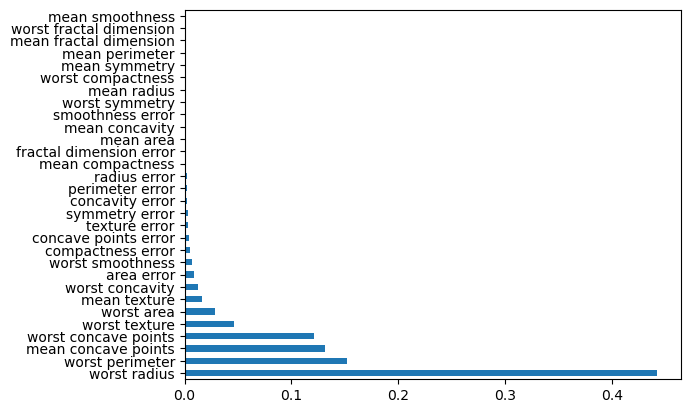

In [23]:
feat_imp = pd.Series(gbc.feature_importances_,
                     index=gbc.feature_names_in_).sort_values(ascending=False)
feat_imp.plot(kind='barh');

## Gradient Boosting - Regression

In [26]:
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)

df_r = pd.DataFrame(data.frame)
df_r.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [29]:
X = df_r.iloc[:,:-1]
y = df_r.iloc[:,-1]

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)

cross_val_score(gbr,X,y,cv=10,scoring='neg_root_mean_squared_error').mean()

-59.07481871472137

### Feature Importance

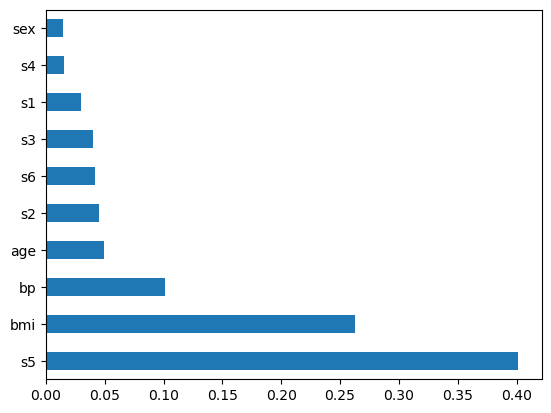

In [38]:
feat_imp = pd.Series(gbr.feature_importances_,
                     index=gbr.feature_names_in_).sort_values(ascending=False)
feat_imp.plot(kind='barh');